In [56]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [4]:
data.shape

(25, 4)

In [11]:
data[:,-1]

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [72]:
def BFGS_multi_var(data , alpha, itr):
    x=data[:,:-1]
    y=data[:,-1]
    y = y.reshape(len(y), 1)
    X = np.concatenate((np.ones(x.shape[0])[:, np.newaxis], x), axis=1)#append bias
    n_features = X.shape[1]
    theta_zero = np.zeros((n_features, 1))
    theta= np.array(n_features * [[0.01]])
    identity_mat=np.eye(n_features)
    b_inv=np.eye(n_features)
    cost=[]
    
    thetas_history = [theta_zero]
    pred_history= [np.dot(X, theta_zero)]
    error_history= [(pred_history[0] - y)]
    d_theta_history= [np.dot(X.T, error_history[0]) / len(X)]
    
    for i in range(itr):
        thetas_history.append(theta)
        pred= np.dot(X, theta)
        pred_history.append(pred)
        error= pred - y
        dj= np.linalg.norm(error)**2 / (2*len(X))
        cost.append(dj.squeeze())
        d_theta= np.dot(X.T, error) / len(X)
        d_theta_history.append(d_theta)
        
        delta_x = theta - thetas_history[-2]
        delta_y = d_theta - d_theta_history[-2]
        b_inv = (identity_mat - ((delta_x @ delta_y.T) / (delta_y.T @ delta_x))) @ b_inv @ (identity_mat -((delta_y @ delta_x.T) / (delta_y.T @ delta_x))) + ((delta_x @ delta_x.T) / (delta_y.T @ delta_x))
        
        theta = theta - alpha * (b_inv @ d_theta)
        if abs(np.linalg.norm(d_theta)) <= 0.000001:
               break
    print(f'Number of iterations: {i}')
    print("----------------------------")
    print('thetas : \n', theta)
    print("----------------------------")
    print('Error Vector:\n', error)
    print("----------------------------")
    print('y_predict:\n', pred)
    print("----------------------------")
    print('y_actual:\n', y)
    print("----------------------------")
    print("Accuracy: " ,r2_score(y,pred))
    
    plt.plot(cost,".b-")
    plt.xlabel("iterations", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()



        
        
        

Number of iterations: 483
----------------------------
thetas : 
 [[-4.3361024 ]
 [ 0.35593822]
 [ 0.54251876]
 [ 1.16744422]]
----------------------------
Error Vector:
 [[ 0.6072044 ]
 [ 0.08011473]
 [ 1.78158548]
 [ 3.74522647]
 [-2.82527929]
 [ 2.69391794]
 [ 1.26322741]
 [-2.17930272]
 [-0.44051605]
 [ 0.49442095]
 [ 2.42337551]
 [ 1.23416416]
 [ 2.5428576 ]
 [ 0.40794528]
 [ 3.24409109]
 [-2.87503386]
 [-3.49780781]
 [-1.10610638]
 [ 0.29838915]
 [-0.65065981]
 [-0.42257584]
 [-0.33634221]
 [-7.31110607]
 [ 1.63279846]
 [-0.8045884 ]]
----------------------------
y_predict:
 [[152.6072044 ]
 [185.08011473]
 [181.78158548]
 [199.74522647]
 [139.17472071]
 [103.69391794]
 [150.26322741]
 [112.82069728]
 [174.55948395]
 [164.49442095]
 [143.42337551]
 [142.23416416]
 [186.5428576 ]
 [152.40794528]
 [151.24409109]
 [189.12496614]
 [143.50219219]
 [181.89389362]
 [177.29838915]
 [158.34934019]
 [176.57742416]
 [174.66365779]
 [167.68889393]
 [150.63279846]
 [191.1954116 ]]
-----------

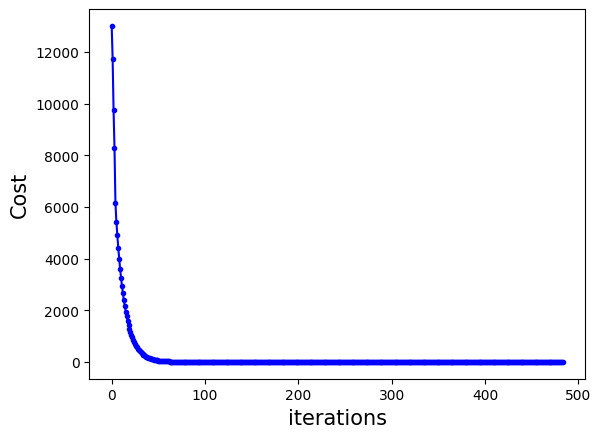

In [73]:
BFGS_multi_var(data , 0.05, 1000)